In [13]:
# -*- coding: utf-8 -*-
# %%
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %% [markdown]
# ### Install packages and import
# %%
# #################################### PLEASE INSTALL LATEST CHROME WEBDRIVER #####################################
# Uncomment to run as required
# #     --install-option="--chromedriver-version= *.**" \
#   --install-option="--chromedriver-checksums=4fecc99b066cb1a346035bf022607104,058cd8b7b4b9688507701b5e648fd821"
# %%
# ##### COPY THE LINES IN THIS COMMENT TO THE TOP OF NEW SCRIPTS #####
# # Function to import this package to other files
# import os
# import sys
# from pathlib import Path

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# main_dir = str(Path(code_dir).parents[0])
# scraped_data = f'{code_dir}/scraped_data'
# sys.path.append(code_dir)

# from setup_module.imports import *
# from setup_module.params import *
# from setup_module.scraping import *
# from setup_module.classification import *
# from setup_module.vectorizers_classifiers import *

# warnings.filterwarnings("ignore", category=DeprecationWarning)
# %matplotlib notebook
# %matplotlib inline

# %%
import os
import sys
from pathlib import Path

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

main_dir = str(Path(code_dir).parents[0])
scraped_data = f'{code_dir}/scraped_data'
sys.path.append(code_dir)

from setup_module.imports import *
# from setup_module.params import *
# from setup_module.scraping import *
# from setup_module.post_collection_processing import *
# from setup_module.classification import *
from setup_module.vectorizers_classifiers import *

warnings.filterwarnings("ignore")

%matplotlib notebook
%matplotlib widget
%matplotlib inline

In [14]:
import os
import sys
import importlib
from pathlib import Path
import numpy as np

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

# %load_ext autoreload
# %autoreload 2


In [15]:
# MAIN DIR
main_dir = f'{str(Path(code_dir).parents[0])}/'

# code_dir
code_dir = f'{code_dir}/'
sys.path.append(code_dir)

# scraping dir
scraped_data = f'{code_dir}scraped_data/'

# data dir
data_dir = f'{code_dir}data/'

# lang models dir
llm_path = f'{data_dir}Language Models'

# sites
site_list=['Indeed', 'Glassdoor', 'LinkedIn']

# columns
cols=['Sector', 
      'Sector Code', 
      'Gender', 
      'Age', 
      'Language', 
      'Dutch Requirement', 
      'English Requirement', 
      'Gender_Female', 
      'Gender_Mixed', 
      'Gender_Male', 
      'Age_Older', 
      'Age_Mixed', 
      'Age_Younger', 
      'Gender_Num', 
      'Age_Num', 
      '% Female', 
      '% Male', 
      '% Older', 
      '% Younger']

int_variable: str = 'Job ID'
str_variable: str = 'Job Description'
gender: str = 'Gender'
age: str = 'Age'
language: str = 'en'
languages = ["en", "['nl', 'en']", ['en', 'nl']]
str_cols = ['Search Keyword', 'Platform', 'Job ID', 'Job Title', 'Company Name', 'Location', 'Job Description', 'Company URL', 'Job URL', 'Tracking ID']
nan_list = [None, 'None', '', ' ', [], -1, '-1', 0, '0', 'nan', np.nan, 'Nan']
pattern = r'[\n]+|[,]{2,}|[|]{2,}|[\n\r]+|(?<=[a-z]\.)(?=\s*[A-Z])|(?=\:+[A-Z])'


In [16]:
import string
import re
import time
import json
import csv
import glob
import pickle
import random
import itertools
import unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
import googletrans
from googletrans import Translator
from collections import defaultdict
random.seed(42)

# # Set up Spacy
# import spacy
# from spacy.symbols import NORM, ORTH, LEMMA, POS
# from spacy.matcher import Matcher

# nlp = spacy.load('en_core_web_sm')

# # Set up NLK
# import nltk
# from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
# from nltk.corpus import stopwords, wordnet
# from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer, LancasterStemmer
# from nltk.tag import pos_tag, pos_tag_sents
# from nltk.util import ngrams, bigrams, trigrams

# nltk_path = f'{llm_path}/nltk'
# nltk.data.path.append(nltk_path)

# nltk.download('words', download_dir = nltk_path)
# nltk.download('stopwords', download_dir = nltk_path)
# nltk.download('punkt', download_dir = nltk_path)
# nltk.download('averaged_perceptron_tagger', download_dir = nltk_path)

# stop_words = set(stopwords.words('english'))
# punctuations = list(string.punctuation)
# lemmatizer = WordNetLemmatizer()
# stemmer = PorterStemmer()

# # Set up Gensim
# from gensim.utils import save_as_line_sentence, simple_preprocess
# from gensim.parsing.preprocessing import remove_stopwords, preprocess_string, preprocess_documents
# from gensim.models.phrases import Phrases, Phraser, ENGLISH_CONNECTOR_WORDS
# from gensim.models import CoherenceModel, FastText, KeyedVectors, TfidfModel, Word2Vec
# from gensim.corpora import Dictionary

# # Set up Bert
# from transformers import AutoTokenizer, AutoModelForTokenClassification, TokenClassificationPipeline, BertTokenizer, BertForPreTraining, BertConfig, BertModel
# bert_model_name = 'bert-base-uncased'
# bert_tokenizer = BertTokenizer.from_pretrained(bert_model_name, strip_accents = True)
# bert_model = BertModel.from_pretrained(bert_model_name)


In [17]:
df_manual = pd.read_pickle(f'{data_dir}df_manual_for_trainning.pkl').reset_index(drop=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5687 entries, 0 to 5686
Columns: 219 entries, % Sector per Workforce to Job Description gensim_123grams_sent2vec_embeddings
dtypes: float64(35), int64(4), object(180)
memory usage: 9.5+ MB


0.000    4276
1.000    1411
Name: Warmth, dtype: int64

0.000    3199
1.000    2488
Name: Competence, dtype: int64

Text(0.5, 0.98, 'Training Dataset: Warmth and Competence Sentence Counts')

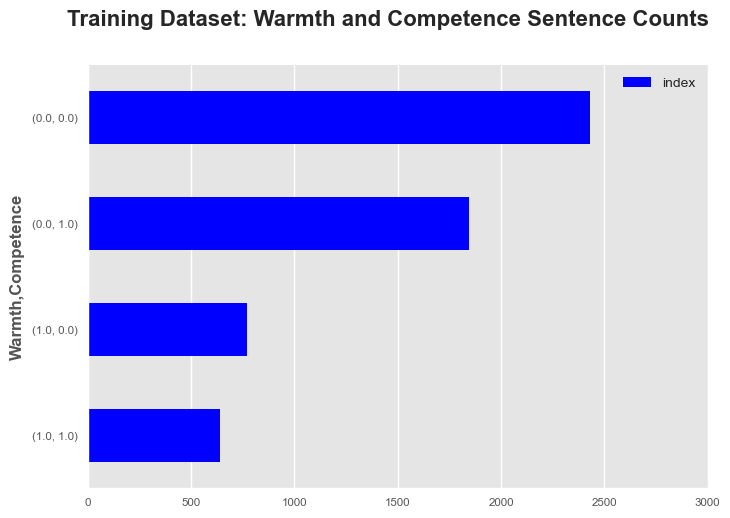

In [18]:
# Visualize data balance
analysis_columns = [
    'Warmth',
    'Competence'
]
df_manual.info()
df_manual['Warmth'].value_counts()
df_manual['Competence'].value_counts()
warm_comp_count = (
    df_manual[analysis_columns]
    .reset_index()
    .groupby(analysis_columns)
    .count()
    .sort_values(by='index')
)
fig, ax = plt.subplots()
fig.suptitle('Training Dataset: Warmth and Competence Sentence Counts', fontsize=16.0)
warm_comp_count.plot(kind='barh', stacked=True, legend=True, color='blue', ax=ax).grid(
    axis='y'
)

fig.savefig(f'{data_dir}/plots/Warmth and Competence Sentence Counts.eps', format='eps', dpi=3000, bbox_inches='tight')

fig.show()

In [33]:
def sent2vec(sentences, embeddings_index=None, external_glove=True, extra_preprocessing_enabled=False):

    if external_glove is False and embeddings_index is None:
        embeddings_index= get_glove()

    if extra_preprocessing_enabled is False:
        words = sentences

    elif extra_preprocessing_enabled is True:
        stop_words = set(sw.words('english'))
        words = str(sentences).lower()
        words = word_tokenize(words)
        words = [w for w in words if (w not in stop_words) and (w.isalpha())]

    M = []

    try:
        for w in words:
            try:
                M.append(embeddings_index[w])
            except Exception:
                continue

        M = np.array(M)
        v = M.sum(axis='index')
        if type(v) != np.ndarray:
            return np.zeros(300)

        return v / np.sqrt((v ** 2).sum())

    except Exception:
        return np.zeros(300)

In [50]:
def split_data(df_manual, col, text_col):
    # BOW Split
    print('Splitting data into training and test sets.')
    df_manual.dropna(subset=['Warmth', 'Competence', text_col], how='any', inplace=True)

    train, test = train_test_split(
        df_manual, test_size=test_split, train_size = 1-test_split, random_state=random_state
    )

    validate, test = train_test_split(
        test, test_size=validation_split, random_state=random_state
    )

    X_train = np.array([x for x in train[f'{str(text_col)}'].astype('str').values])
#     prepared_X_train = X_train.to_list()

    y_train = column_or_1d(train[str(col)].astype('int64').values, warn=True)
#     prepared_y_train = y_train.to_list()

    X_test = np.array([sent2vec(x) for x in test[f'{str(text_col)}'].astype('str').values])
#     prepared_X_test = X_test.to_list()

    y_test = column_or_1d(test[str(col)].astype('int64').values, warn=True)
#     prepared_y_test = y_test.to_list()

    X_validate = np.array([sent2vec(x) for x in validate[f'{str(text_col)}'].astype('str').values])
#     prepared_X_validate = X_validate.to_list()

    y_validate = column_or_1d(validate[str(col)].astype('int64').values, warn=True)
#     prepared_y_validate = y_validate.to_list()


    return train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate

In [37]:
# Word Embedding with Fasttext
def word_embedding(df_jobs, X_train, feature_names):

    sentences = df_jobs['2grams_gensim']

    fasttext_model = FastText(sentences, window=3, min_count=1, sorted_vocab=1)

    row=0
    errors=0
    for sent in tqdm.tqdm(sentences):
        sent_vec = np.zeros(100)
        weight_sum =0
        for word in sent:
            try:
                # weight = fasttext_model.wv.get_vector(word)
                # weight_sum += weight
                # sent_vec += weight
                vec = fasttext_model.wv[word]
                feat = X_train[row, feature_names.index(word)]
                sent_vec += (vec * feat)
                weight_sum += feat
            except Exception:
                errors += 1
        sent_vec /= weight_sum
                # print(np.isnan(np.sum(sent_vec)))
    sent_vectors = [sent_vec]
    row += 1
    print(f'errors noted: {str(errors)}')

    return fasttext_model, sent_vectors

def emb_poed(vectorizer, X_train, y_train, X_test, y_test, X_validate, y_validate, feature_names):

    # Get words and offsets
    train_words, train_offsets = train_offset(X_train, 'train')
    test_words, test_offsets = train_offset(X_test, 'test')
    validate_words, validate_offsets = train_offset(X_validate, 'validate')

    if hasattr(vectorizer, 'vocabulary_'):
        vocabulary_map = vectorizer.vocabulary_
        if plots_enabled:
            sns.heatmap(X_train.todense()[:,np.random.randint(0,X.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

        embs = load_glove_with_vocabulary(vocabulary_map, feature_names, print_enabled=print_enabled)
        emb_model = BagOfEmbeddings(embs, dropout=0.1, hidden_dim=75, embedding_mode='mean')
        print(f'Embedding Model: {emb_model}')

        loss = nn.BCEWithLogitsLoss()
        optimizer = torch.optim.Adam(emb_model.parameters(), lr = 0.001)
        torch.manual_seed(random_state)
        losses = run_training(epochs=1, emb_model=emb_model, optimizer=optimizer, loss_fn=loss,
                            all_words=train_words, all_offsets=train_offsets, all_targets=y_train,
                            batch_size=32)
        print("Training avg emb_model complete!")

        print("Evaluating test set")
        batch_losses, outputs = run_test(emb_model=emb_model, loss_fn=loss,
                            all_words=test_words, all_offsets=test_offsets, all_targets=y_train,
                            batch_size=256)

        print("outputs.shape", outputs.shape)

        boe_pred = outputs.detach().numpy()

        best_threshold_boe, best_score_boe = calculate_best_threshold(y_test[:300], boe_pred[:300], scoring, print_enabled)

        print("boe_pred:\n", boe_pred[10])

        print("Evaluating validate outputs")
        _, validate_outputs = run_test(emb_model=emb_model, loss_fn=None,
                            all_words=validate_words, all_offsets=validate_offsets, all_targets=None,
                            batch_size=256)

        boe_validate_pred = validate_outputs.detach().numpy()
        print("boe_validate_pred:\n", boe_validate_pred[10])
        print("Validate outputs done")

    else:
        vocabulary_map = None
        boe_pred = None
        boe_validate_pred = None
        best_threshold_boe = None
        best_score_boe = None

    return vocabulary_map, boe_pred, boe_validate_pred, best_threshold_boe, best_score_boe



In [38]:
# Get data and target arrays
def vectorize(vectorizer, vectorizer_name, selector, df_manual, col, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate):
    print(
        f'============================ {str(col)}: {vectorizer_name} passed ============================'
    )

    refit_vectorizer = vectorizer

    # prepared_X_train = X_train.to_list()
    # prepared_y_train = y_train.to_list()
    # prepared_X_test = X_test.to_list()
    # prepared_y_test = y_test.to_list()
    # prepared_X_validate = X_validate.to_list()
    # prepared_y_validate = y_validate.to_list()

    prepared_X_train, prepared_y_train, prepared_X_test, prepared_y_test, prepared_X_validate, prepared_y_validate = list(map(lambda x: x.to_list(), [X_train, y_train, X_test, y_test, X_validate, y_validate]))

    prepared_text = vectorizer.fit_transform(prepared_X_train+prepared_X_test+prepared_X_validate)

    # BOW fit transform
    X_train = vectorizer.fit_transform(X_train)
    # Selecting best features
    if select_best_enabled is True:
        X_train = selector.fit_transform(X_train, y_train)
    # Oversampling to fix imbalance
    if (resampling_enabled is True) and (col == 'Warmth'):
        X_train, y_train = resample_data(X_train, y_train, col, resampling_enabled, resampling_method)

    # Get feature names
    X_train, vectorizer, dtf_features, X_names, feature_names = get_feature_name_and_refit_X_train_on_chi_test(train, X_train, vectorizer, refit_vectorizer)
    unique_features = set(feature_names)

    # BOW fit
    print('Fitting and transforming data.')
    X_test = vectorizer.transform(X_test)
    X_validate = vectorizer.transform(X_validate)
    # Selecting best features
    if select_best_enabled is True:
        X_test = selector.transform(X_test)
        X_validate = selector.transform(X_validate)
        # Get feature names
        feature_names = selector.get_feature_names_out(vocabulary=X_names)
        unique_features = set(feature_names)

    # y to numpy array
    y_train = torch.from_numpy(np.array(y_train)).float()
    y_test = torch.from_numpy(np.array(y_test)).float()
    if print_enabled:
        print(f'Train targets: {y_train}')
        print(f'Test targets: {y_test}')

    if hasattr(vectorizer, 'vocabulary_'):
        vocabulary_map = vectorizer.vocabulary_
        if plots_enabled:
            sns.heatmap(X_train.todense()[:,np.random.randint(0,X.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

    # vocabulary_map, boe_pred, boe_validate_pred, best_threshold_boe, best_score_boe = emb_poed(vectorizer, X_train, y_train, X_test, y_test, X_validate, y_validate, feature_names)

    # fasttext_model, sent_vectors = word_embedding(df_jobs, X_train, feature_names)

    return vectorizer, selector, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, feature_names, unique_features, vocabulary_map


In [39]:
def get_df_preds(best_threshold, y_final_validate_prob_pred, test, col, vectorizer_name, classifier_name, save_enabled=save_enabled):

    # Save DF of predictions
    labels = (y_final_validate_prob_pred > best_threshold).astype(int)
    df_preds = pd.DataFrame({f'{str(text_col)}': test[f'{str(text_col)}'], "prediction": labels})
    if save_enabled:
        df_preds.to_csv(f'{df_dir}df_preds_{str(col)} - {vectorizer_name} + {classifier_name}.{file_save_format_backup}', index=False)

    return df_preds


def augment(classifier, classifier_name, vectorizer, vectorizer_name, final_classifier, test, y_test, y_test_prob_pred, validate, y_validate, y_validate_prob_pred, boe_pred, boe_validate_pred, scoring, print_enabled):

    num = len(test) // 2

    best_threshold, best_score = calculate_best_threshold(y_test[:num], y_test_prob_pred[:num], scoring, print_enabled)

    if (boe_pred is not None) and (boe_validate_pred is not None):
        num = len(boe_pred) // 2

        X_final_augmented_train = pd.DataFrame({
            "y_test_prob_pred": y_test_prob_pred[:num],
            "boe_pred": boe_pred[:num].squeeze(),
            "num_words": test["num_words"].values[:num],
            "num_chars": test["num_chars"].values[:num]})
        y_final_augmented_train = y_test[:num]

        X_final_augmented_test = pd.DataFrame({
            "y_test_prob_pred": y_test_prob_pred[num:],
            "boe_pred": boe_pred[num:].squeeze(),
            "num_words": test["num_words"].values[num:],
            "num_chars": test["num_chars"].values[num:]})
        y_final_augmented_test = y_test[num:]

        final_classifier = final_classifier.fit(X_final_augmented_train, y_final_augmented_train)

        if hasattr(final_classifier, 'predict_proba'):
            y_final_test_prob_pred = final_classifier.predict_proba(X_final_augmented_test)[:, 1]
        elif hasattr(final_classifier, '_predict_proba_lr'):
            y_final_test_prob_pred = final_classifier._predict_proba_lr(X_final_augmented_test)[:, 1]

        best_threshold_final, best_score_final = calculate_best_threshold(y_final_augmented_test, y_final_test_prob_pred, scoring, print_enabled)

        X_final_augmented_validate = pd.DataFrame({
            "y_validate_prob_pred": y_validate_prob_pred,
            "boe_validate_pred": boe_validate_pred.squeeze(),
            "num_words": validate["num_words"].values,
            "num_chars": validate["num_chars"].values})
        y_final_augmented_validate = y_validate

        y_final_validate_prob_pred = final_classifier.predict_proba(X_final_augmented_validate)[:,1]

        df_preds = get_df_preds(best_threshold_final, y_final_validate_prob_pred, validate, col, vectorizer_name, classifier_name)

    elif (boe_pred is None) and (boe_validate_pred is None):
        final_classifier = classifier
        X_final_augmented_validate = X_test
        y_final_augmented_validate = y_test
        y_final_validate_prob_pred = y_test_prob_pred
        df_preds = get_df_preds(best_threshold, y_final_validate_prob_pred, test, col, vectorizer_name, classifier_name)

    return final_classifier, X_final_augmented_validate, y_final_augmented_validate, y_final_validate_prob_pred, best_threshold, best_score, df_preds

In [40]:
# Fit classifier
def classify(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name):
    print('\n')
    print(
        f'============================ {str(col)}: {vectorizer_name} + {classifier_name} passed ============================'
    )
    num = len(test) // 2

    # BOW model
    if classifier_name == 'GaussianNB':
        X_train = X_train.todense()
        X_test = X_test.todense()
        X_validate = X_validate.todense()

    if classifier_name == 'Sequential':
        classifier.compile(loss='categorical_crossentropy')
    if hasattr(classifier, 'decision_function') and not hasattr(classifier, 'predict_proba'):
        classifier = CalibratedClassifierCV(classifier, cv = cv, method = 'sigmoid')

    # final_classifier = classifier
    classifier = classifier.fit(X_train, y_train)
    classifier = SelectFromModel(estimator=classifier, prefit=True).fit(X_train, y_train)

    ### NEW ### https://machinelearningmastery.com/calculate-feature-importance-with-python/
    # summarize feature importance
    importance = classifier.coef_
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

    if hasattr(classifier, 'predict_proba'):
        y_test_prob_pred = classifier.predict_proba(X_test)
        y_validate_prob_pred = classifier.predict_proba(X_validate)
    elif hasattr(classifier, '_predict_proba_lr'):
        y_test_prob_pred = classifier._predict_proba_lr(X_test)
        y_validate_prob_pred = classifier._predict_proba_lr(X_validate)
    else:
        raise(f'{classifier_name} has neither predict_proba nor _predict_proba_lr attributes.')

    # final_classifier, X_test, y_test, y_test_prob_pred, best_threshold, best_score, df_preds = augment(classifier, classifier_name, vectorizer, vectorizer_name, final_classifier, test, y_test, y_test_prob_pred, validate, y_validate, y_validate_prob_pred, boe_pred, boe_validate_pred, scoring, print_enabled)

    return classifier, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, y_test_prob_pred, y_validate_prob_pred

In [41]:
# Evaluate Model
def evaluate_model(X_train, y_train, X_test, y_test, table_df, classifier, classifier_name, vectorizer, vectorizer_name, col, text_col, scoring):

    # Evaluate
    print('\n')
    print('-' * 20)
    print(
        f'EVALUATING FITTED MODEL - {vectorizer_name} + {classifier_name}: ',
        has_fit_parameter(classifier, 'sample_weight'),
    )
    # 5 cross_validation score
    print(f'Cross Validating - {vectorizer_name} + {classifier_name}.')
    cross_validate_score = cross_validate(
        classifier,
        X_test,
        y_test,
        cv=cv,
        return_train_score=True,
        scoring=scores,
    )

    cross_validate_score_noscoring = cross_validate(
        classifier,
        X_test,
        y_test,
        cv=cv,
        return_train_score=True,
    )

    print(
        f'Mean cross_validate scores - {vectorizer_name} + {classifier_name}: {cross_validate_score_noscoring.get("test_score").mean()}'
    )
    numberoflabels = len(set((str(e) for e in y_test.to_list())))

    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Mean Validation Score')
    ] = float(cross_validate_score_noscoring.get('test_score').mean())
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Explained Variance')
    ] = float(
        cross_validate_score.get('test_explained_variance').mean()
    )

    print('-' * 20)
    for key, values in cross_validate_score.items():
        if 'test' in key:
            print(key, ' mean ', values.mean())
    print('-' * 20)
    print('\n')

    # Predictions
    print('-' * 20)
    print(
        f'============================ {str(col)} PREDICTIONS FOR {vectorizer_name.upper()} WITH {classifier_name.upper()} ============================'
    )
    print('\n')
    print(f'y_test_pred - {str(col)} - {vectorizer_name} + {classifier_name}:')
    dic_y_mapping = dict(enumerate(np.unique(y_train)))
    inverse_dic = {v:k for k,v in dic_y_mapping.items()}
    y_train = np.array([inverse_dic[y] for y in y_train])

    y_test_pred = classifier.predict(X_test)
    if classifier_name == 'GaussianNB':
        # y_test_pred = y_test_pred.to_list()
        y_test_pred = classifier.predict(X_test.todense())
    predicted = [dic_y_mapping[np.argmax(pred)] for pred in y_test_pred]
    acc_roc_f1 = evaluate_print(classifier_name + '   |   ', y_test, y_test_pred)
    cm, precision, recall, accuracy, f1, mcc, best_threshold, best_score, report = evaluation(
        y_test, y_test_pred, scoring, print_enabled
    )

    true_negative = cm[0][0]
    false_positives = cm[0][1]
    false_negatives = cm[1][0]
    true_positives = cm[1][1]

    report_test = predict(
        X_test,
        y_test,
        classifier,
        classifier_name,
        col,
        scoring,
        df_manual,
        print_enabled,
    )

    print(f'REPORT TEST {str(col)} - {vectorizer_name} + {classifier_name}:\n', report_test)
    print('-' * 20)

    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Accuracy')
    ] = float(accuracy)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Precision')
    ] = float(precision)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Recall')
    ] = float(recall)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'F1-score')
    ] = float(f1)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Matthews Correlation Coefficient'),
    ] = float(mcc)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, f'{scoring.title()} Best Threshold'),
    ] = float(best_threshold)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, f'{scoring.title()} Best Score'),
    ] = float(best_score)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Classification Report')
    ] = report
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Confusion Matrix')
    ] = str(cm)

    # Plot
    heatmap = plot_confusion_matrix_percentage(col, cm, classifier_name, vectorizer_name)
    plt.show()
    if save_enabled is True:
        heatmap.figure.savefig(
            f'{plot_save_path}Confusion Matrix {str(col)} - {vectorizer_name} + {classifier_name}.{image_save_format}',
            format=image_save_format,
            dpi=3000,
            )
    plt.clf()
    plt.cla()
    plt.close()

    # Log Loss Cross Entropy
    if hasattr(classifier, 'predict_proba'):
        y_test_prob_pred = classifier.predict_proba(X_test)[:, 1]
        probability_of_1 = y_test_prob_pred#[:, 1]

        loss = log_loss(y_test, y_test_prob_pred)
        print('\n')
        print('=' * 20)
        print(f'Log Loss / Cross Entropy = {loss}')
        print('=' * 20)
        print('\n')
        table_df.loc[
            (classifier_name),
            (col, vectorizer_name, 'Log Loss/Cross Entropy'),
        ] = float(loss)

        # Explain Model
        explained = explain_model(test, y_test, y_test_pred, y_test_prob_pred, y_train)
        if plots_enabled:
            explained.show_in_notebook(text=txt_instance, predict_proba=False)

        # ROC Curve
        table_df, fpr, tpr, thresholds, auc, roc_curve, roc_auc = get_roc_curve(classifier, X_test, y_test, y_test_pred, probability_of_1, vectorizer_name, classifier_name, col)

        # Precision Recall Curve
        get_pr_curve(X_test, y_test, recall, precision, auc, vectorizer_name, classifier_name, col)

    # Optimization
    if optimization_enabled is True and hasattr(classifier, 'predict_log_proba'):
        classifier, table_df, y_test_prob_log_pred, y_test_pred_new, cm_opt, precision_opt, recall_opt, accuracy_opt, f1_opt, mcc_opt, report_opt = optimize_model(
            classifier,
            X_test,
            y_test,
            probability_of_1,
            vectorizer_name,
            classifier_name,
            table_df,
            score)

        # ROC Curve
        table_df, fpr, tpr, thresholds, auc, roc_curve, roc_auc = get_roc_curve(classifier, X_test, y_test, y_test_pred_new, probability_of_1, vectorizer_name, classifier_name, col)

        # Precision Recall Curve
        print(f'Precision Recall Curve AFTER OPTIMIZATION - {str(col)} - {vectorizer_name} + {classifier_name}')
        get_pr_curve(X_test, y_test, recall_opt, precision_opt, auc, vectorizer_name, classifier_name, col)

    if hasattr(classifier, 'best_estimator_'):
        ohe_cols = list(
            classifier.best_estimator_.named_steps['vectorizer']
            .named_transformers_['cat']
            .named_steps['ohe']
            .get_feature_names(input_features=categorical)
        )
        num_feats = list(numerical)
        num_feats.extend(ohe_cols)
        feat_imp = eli5.explain_weights_df(
            classifier.best_estimator_.named_steps['classifier'],
            top=10,
            feature_names=num_feats,
        )
        print(
            f'feat_imp - {str(col)} - {vectorizer_name} + {classifier_name}: ',
            feat_imp,
        )
        print('-' * 20)
        print('\n')

    report_test = predict(
        X_test,
        y_test,
        classifier,
        classifier_name,
        col,
        scoring,
        df_manual,
        print_enabled,
    )
    print(f'REPORT TEST {str(col)} - {vectorizer_name} + {classifier_name}:\n', report_test)
    print('-' * 20)

    return classifier, table_df

In [42]:
# ROC Curve
def get_roc_curve(classifier, X_test, y_test, y_test_pred, probability_of_1, vectorizer_name, classifier_name, col):
    roc_curve = metrics.plot_roc_curve(classifier, X_test, y_test)
    plt.title(
        f'ROC Curve {str(col)} - {vectorizer_name} + {classifier_name}',
        fontsize=16,
    )
    if save_enabled is True:
        roc_curve.figure_.savefig(
            plot_save_path
            + f'ROC {str(col)} - {classifier_name} - {vectorizer_name}.{image_save_format}',
            format=image_save_format,
            dpi=3000,
        )
    fpr, tpr, thresholds = metrics.roc_curve(
        y_test, probability_of_1, pos_label=1
    )
    auc = metrics.auc(fpr, tpr)
    roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'ROC')
    ] = float(roc_auc)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'AUC')
    ] = float(auc)

    print('\n')
    print('-' * 20)
    print(f'AUC {str(col)} - {vectorizer_name} + {classifier_name}:\n', auc)

    print('ROC CURVE FOR PREDICTED PROBABILITIES')
    bc = BinaryClassification(y_test, y_test_pred, labels=['0', '1'])
    # Figures
    plt.figure(figsize=(5, 5))
    bc.plot_roc_curve()
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],
                            predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3,
                label='{0} (area={1:0.2f})'.format(classes[i],
                                metrics.auc(fpr, tpr))
                )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05],
            xlabel='False Positive Rate',
            ylabel="True Positive Rate (Recall)",
            title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    return table_df, fpr, tpr, thresholds, auc, roc_curve, roc_auc

In [43]:
# Precision Recall Curve
def get_pr_curve(X_test, y_test, recall, precision, auc, vectorizer_name, classifier_name, col):

    no_skill = len(y_test[y_test == 1]) / len(y_test)
    pr_curve = plt.figure(figsize=(4.0, 4.0))
    plt.plot(
        [0, 1], [no_skill, no_skill], linestyle='--', label='No Skill'
    )
    plt.plot(
        recall, precision, marker='.', label=f'AUC = {auc}'
    )
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title(
        f'Precision Recall Curve {str(col)} - {vectorizer_name} + {classifier_name}',
        fontsize=12.0,
    )
    plt.ylabel('Precision', fontsize=12.0)
    plt.xlabel('Recall', fontsize=12.0)
    plt.show()
    if save_enabled is True:
        pr_curve.savefig(
            plot_save_path
            + f'Precision Recall Curve {str(col)} - {vectorizer_name} + {classifier_name}.{image_save_format}',
            format=image_save_format,
            dpi=3000,
        )
    plt.clf()
    plt.cla()
    plt.close()

    classes = np.unique(y_test)
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
            y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3,
                label=f'{classes[i]} (area={metrics.auc(recall, precision):0.2f})')
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall',
            ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.show()

In [44]:
# Optimize Model
def optimize_model(classifier, X_test, y_test, probability_of_1, vectorizer_name, classifier_name, table_df, scoring):
    if hasattr(classifier, 'predict_log_proba'):

        y_test_prob_log_pred = classifier.predict_log_proba(X_test)[:, 1]

        # calculate pr-curve
        (
            precision_opt,
            recall_opt,
            thresholds_opt,
        ) = metrics.precision_recall_curve(
            y_test, probability_of_1
        )
        # convert to f score
        fscore_opt = (2 * precision_opt * recall_opt) / (
            precision_opt + recall_opt
        )
        # locate the index of the largest f score
        ix_opt = argmax(fscore_opt)
        best_thresh_opt = thresholds_opt[ix_opt]
        print('=' * 20)
        print(
            f'Best Threshold: {best_thresh_opt}, F-Score={fscore_opt[ix_opt]}'
        )
        print(f'Optimal threshold: {np.exp(best_thresh_opt)}')
        y_test_pred_new = np.where(
            y_test_prob_log_pred[:, 1] > best_thresh_opt, 1, 0
        )
        print(f'New y_test_pred {str(col)} - {vectorizer_name} + {classifier_name}:\n{y_test_pred_new}')

        print(
            f'SCORES FOR {str(col)} - {vectorizer_name} + {classifier_name} AFTER OPTIMIZATION:'
        )
        cm_opt, precision_opt, recall_opt, accuracy_opt, f1_opt, mcc_opt, best_threshold_opt, best_score_opt, report_opt = evaluation(
            y_test, y_test_pred_new, scoring, print_enabled
        )

        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'Accuracy_opt')
        ] = float(accuracy_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'Precision_opt')
        ] = float(precision_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'Recall_opt')
        ] = float(recall_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'F1-score_opt')
        ] = float(f1_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'Matthews Correlation Coefficient_opt'),
        ] = float(mcc_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, f'{scoring.title()} Best Threshold_opt'),
        ] = float(best_threshold_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, f'{scoring.title()} Best Score_opt'),
        ] = float(best_score_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'Classification Report_opt'),
        ] = report_opt
        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'Confusion Matrix_opt'),
        ] = str(cm_opt)

        print('=' * 20)

    elif not hasattr(classifier, 'predict_log_proba'):
        print('Classifier has no Attribute predict_log_proba.')

    return classifier, table_df, y_test_prob_log_pred, y_test_pred_new, cm_opt, precision_opt, recall_opt, accuracy_opt, f1_opt, mcc_opt, report_opt

In [45]:
# Save Model
def saving_model_and_table(vectorizer, vectorizer_name, selector, selector_name, classifier, classifier_name, col, table_df, data_dir=data_dir):
#     if save_enabled is True:
#         if task_enabled is False:

    models_save_path = f'{data_dir}classification models/'
    table_save_path = f'{data_dir}output tables/'
    pickle_file_name = 'Classifiers Table.pkl'
    csv_file_name = 'Classifiers Table.csv'
    excel_file_name = 'Classifiers Table.xlsx'
    latex_file_name = 'Classifiers Table.tex'
    markdown_file_name = 'Classifiers Table.md'

    classifier_save_path = (
        f'{models_save_path}Model {str(col)} - {vectorizer_name} + {classifier_name}.{file_save_format}'
    )
    vectorizer_save_path = (
        f'{models_save_path}Vectorizer {str(col)} - {vectorizer_name} + {classifier_name}.{file_save_format}'
    )
    selector_save_path = (
        f'{models_save_path}Selector {str(col)} - {vectorizer_name} + {classifier_name}.{file_save_format}'
    )

    # Save classifier
    print(f'Saving Model and Table for {vectorizer_name} + {classifier_name}.')
    table_df.to_csv(table_save_path + csv_file_name)
    table_df.to_pickle(table_save_path + pickle_file_name)
    table_df.to_excel(table_save_path + excel_file_name)
    table_df.style.to_latex(table_save_path + latex_file_name)
    table_df.to_markdown(table_save_path + markdown_file_name)

    with open(classifier_save_path, 'wb') as f:
        joblib.dump(classifier, f)
    with open(vectorizer_save_path, 'wb') as f:
        joblib.dump(vectorizer, f)
    if select_best_enabled is True:
        with open(selector_save_path, 'wb') as f:
            joblib.dump(selector, f)

    elif save_enabled is False:
        print('Saving Model and Table is disabled.')



In [46]:
def classify_and_evaluate(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name, boe_pred, boe_validate_pred, table_df, col, text_col, scoring):

    if classifier_name == 'DummyClassifier' and use_dict_for_classifiers_vectorizers is False:
        classifier_name += f' - {str(classifier.strategy).title()}'
    classifier, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, y_test_prob_pred, y_validate_prob_pred = classify(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name)
    classifier, table_df = evaluate_model(X_train, y_train, X_test, y_test, table_df, classifier, classifier_name, vectorizer, vectorizer_name, col, text_col, scoring)

    return classifier, table_df, X_test, y_test, y_test_prob_pred



In [47]:
def no_pipe(df_manual, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, vectorizers, selector, classifiers, col, text_col, scoring, table_df, table_save_path, models_save_path, csv_file_name, pickle_file_name, excel_file_name, latex_file_name, markdown_file_name):

    print('Not using Search')

    if use_dict_for_classifiers_vectorizers is True:
        print('Using dict for classifiers and vectorizers.')
        for vectorizer_name, vectorizer_and_params in vectorizers.items():
            vectorizer = vectorizer_and_params[0]
            vectorizer_params = vectorizer_and_params[1]
            vectorizer.set_params(**vectorizer_params)
            vectorizer, selector, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, feature_names, unique_features, vocabulary_map = vectorize(vectorizer, vectorizer_name, selector, df_manual, col, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate)

            for classifier_name, classifier_and_params in classifiers.items():
                classifier = classifier_and_params[0]
                classifier_params = classifier_and_params[1]
                classifier.set_params(**classifier_params)
                classifier, table_df, X_test, y_test, y_test_prob_pred = classify_and_evaluate(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name, boe_pred, boe_validate_pred, table_df, col, text_col, scoring)

                # Save Vectorizer, Selector, and Classifier
                if save_enabled is True:
                    saving_model_and_table(vectorizer, vectorizer_name, selector, selector_name, classifier, classifier_name, col, table_save_path, table_df, models_save_path, csv_file_name, pickle_file_name, excel_file_name, latex_file_name, markdown_file_name)

    elif use_dict_for_classifiers_vectorizers is False:
        print('Using list for classifiers and vectorizers.')
        for vectorizer in vectorizers_lst:
            vectorizer_name = vectorizer.__class__.__name__
            vectorizer, selector, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, feature_names, unique_features, vocabulary_map = vectorize(vectorizer, vectorizer_name, selector, df_manual, col, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate)

            for classifier in classifiers_lst:
                classifier_name = classifier.__class__.__name__
                classifier, table_df, X_test, y_test, y_test_prob_pred = classify_and_evaluate(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name, boe_pred, boe_validate_pred, table_df, col, text_col, scoring)

                # Save Vectorizer, Selector, and Classifier
                if save_enabled is True:
                    saving_model_and_table(vectorizer, vectorizer_name, selector, selector_name, classifier, classifier_name, col, table_save_path, table_df, models_save_path, csv_file_name, pickle_file_name, excel_file_name, latex_file_name, markdown_file_name)

    return df_manual, classifier, vectorizers, selector, table_df



In [52]:
def pipe(df_manual, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, vectorizers, selector, classifiers, col, text_col, scoring):

    print('Using Search')

    print('Using dict for classifiers and vectorizers.')

    models_save_path = f'{data_dir}classification models/'
    table_save_path = f'{data_dir}output tables/'
    pickle_file_name = 'Classifiers Table.pkl'
    csv_file_name = 'Classifiers Table.csv'
    excel_file_name = 'Classifiers Table.xlsx'
    latex_file_name = 'Classifiers Table.tex'
    markdown_file_name = 'Classifiers Table.md'

    # Vectorization
    for vectorizer_name, vectorizer_and_params in vectorizers_pipe.items():
        vectorizer = vectorizer_and_params[0]
        vectorizer_params = vectorizer_and_params[1]

        # Selection
        for selector_name, selector_and_params in selectors_pipe.items():
            selector = selector_and_params[0]
            selector_params = selector_and_params[1]

            # Classification
            for classifier_name, classifier_and_params in classifiers_pipe.items():
                classifier = classifier_and_params[0]
                classifier_params = classifier_and_params[1]

                # Pipeline
#                 if select_best_enabled is True:
                ## Steps
                steps = [
                    (vectorizer_name, vectorizer),
                    (selector_name, selector),
                    (classifier_name, classifier)
                ]
                ## Params
                param_grid = {
                    **vectorizer_params,
                    **selector_params,
                    **classifier_params,
                }
                ## Pipeline
                pipe = Pipeline(steps=steps)

                ## Vectorizers, selectors, classifiers
                vectorizer = pipe[:-2]
                selector = pipe[:-1]
                classifier = pipe[:]

#                 elif select_best_enabled is False:
#                     ## Steps
#                     steps = [
#                         (vectorizer_name, vectorizer),
#                         (classifier_name, classifier)
#                     ]
#                     ## Params
#                     param_grid = {
#                         **vectorizer_params,
#                         **classifier_params,
#                     }
#                     ## Pipeline
#                     pipe = Pipeline(steps=steps)

#                     ## Vectorizers, selectors, classifiers
#                     vectorizer = pipe[:-1]
#                     classifier = pipe[:]

                # Search
                search = RandomizedSearchCV(
                    estimator=pipe,
                    param_distributions=param_grid,
                    n_jobs=-1,
                    scoring=scores,
                    cv=cv,
                    refit=scores[0],
                    return_train_score=True,
                    verbose=3,
                )

                # Fit SearchCV
                searchcv = search.fit(X_train, y_train, error_score='raise')

                # Best Parameters
                best_index = searchcv.best_index_
                cv_results = sorted(searchcv.cv_results_)
                best_params = searchcv.best_params_
                classifier = searchcv.best_estimator_
                y_train_pred = classifier.predict(X_train)
                best_score = searchcv.best_score_
                n_splits = searchcv.n_splits_

                print('=' * 20)
                print(f'Best index for {scores[0]}: {best_index}')
                print(f'Best classifier for {scores[0]}: {classifier}')
                print(f'Best y_train_pred for {scores[0]}: {y_train_pred}')
                print(f'Best score for {scores[0]}: {best_score}')
                print(f'Number of splits for {scores[0]}: {n_splits}')

                print('-' * 20)
                report = classification_report(y_train, y_train_pred)
                print(f'Classification Report:\n{report}')
                ConfusionMatrixDisplay.from_estimator(
                    searchcv, X_test, y_test, xticks_rotation="vertical"
                )
                plt.tight_layout()
                plt.show()
                print('=' * 20)

                # Make the predictions
                score = searchcv.score(X_test, y_test)
                y_test_pred = searchcv.predict(X_test)
                if hasattr(searchcv, 'predict_proba'):
                    y_test_prob_pred = searchcv.predict_proba(X_test)[:, 1]
                    y_validate_prob_pred = searchcv.predict_proba(X_validate)[:, 1]
                elif hasattr(searchcv, '_predict_proba_lr'):
                    y_test_prob_pred = searchcv._predict_proba_lr(X_test)[:, 1]
                    y_validate_prob_pred = searchcv._predict_proba_lr(X_validate)[:, 1]

                # Fit Best Model
                print(f'Fitting {classifier}.')
                classifier.set_params(**classifier.get_params())
                classifier = classifier.fit(X_train, y_train)

                # Evaluate Model
                classifier, table_df = evaluate_model(X_train, y_train, X_test, y_test, table_df, classifier, classifier_name, vectorizer, vectorizer_name, col, text_col, scoring)

                # Save Vectorizer, Selector, and Classifier
                saving_model_and_table(vectorizer, vectorizer_name, selector, selector_name, classifier, classifier_name, col, table_df)

    return df_manual, searchcv, classifier, vectorizers, selector, table_df



# Training Supervised Model: Warmth and Competence

In [53]:
for col in tqdm.tqdm(analysis_columns):
    print('-' * 20)
    print('\n')
    print(f'============================ STARTING PROCESSING {col.upper()} ============================')
    print('\n')
    print('-' * 20)
    if (
        len(
            df_manual[
                df_manual[str(col)].map(
                    df_manual[str(col)].value_counts() > 50
                )
            ]
        )
        != 0
    ):

        # BOW Split
        train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate = split_data(df_manual, col, text_col)

        df_manual, searchcv, classifier, vectorizers, selector, table_df = pipe(df_manual, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, vectorizers, selector, classifiers, col, text_col, scoring)

    print('-' * 20)
    print('\n')
    print(f'============================ FINISHED PROCESSING {col.upper()} ============================')
    print('\n')
    print('-' * 20)



  0%|                                                                                                                                                                                                                                                     | 0/2 [00:00<?, ?it/s]

--------------------


============================ STARTING PROCESSING WARMTH ============================


--------------------
Splitting data into training and test sets.
Using Search
Using dict for classifiers and vectorizers.
Fitting 30 folds for each of 10 candidates, totalling 300 fits
[CV 3/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=True, CountVectorizer__max_df=0.85, CountVectorizer__min_df=0.25, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=uniform, SelectKBest__k=10000, SelectKBest__score_func=<function f_classif at 0x1149b4040>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, test=nan) matthews_corrcoef: (train=nan, test=nan) precision: (train=nan, test=nan) recall: (train=nan, test=nan) roc_auc: (train=nan, test=nan) total time=   0.3s
[CV 12/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=True, CountVectorizer__max_df=0.85, CountVectori

[CV 1/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=True, CountVectorizer__max_df=0.85, CountVectorizer__min_df=0.2, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=stratified, SelectKBest__k=5000, SelectKBest__score_func=<function chi2 at 0x128018160>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, test=nan) matthews_corrcoef: (train=nan, test=nan) precision: (train=nan, test=nan) recall: (train=nan, test=nan) roc_auc: (train=nan, test=nan) total time=   0.2s
[CV 9/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=True, CountVectorizer__max_df=0.85, CountVectorizer__min_df=0.2, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=stratified, SelectKBest__k=5000, SelectKBest__score_func=<function chi2 at 0x128018160>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, test=n

[CV 10/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=False, CountVectorizer__max_df=0.75, CountVectorizer__min_df=0.25, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=constant, SelectKBest__k=10000, SelectKBest__score_func=<function f_classif at 0x11754c040>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, test=nan) matthews_corrcoef: (train=nan, test=nan) precision: (train=nan, test=nan) recall: (train=nan, test=nan) roc_auc: (train=nan, test=nan) total time=   0.1s
[CV 14/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=False, CountVectorizer__max_df=0.75, CountVectorizer__min_df=0.25, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=constant, SelectKBest__k=10000, SelectKBest__score_func=<function f_classif at 0x11754c040>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (tra

[CV 14/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=False, CountVectorizer__max_df=0.75, CountVectorizer__min_df=0.25, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=42, DummyClassifier__strategy=uniform, SelectKBest__k=100, SelectKBest__score_func=<function chi2 at 0x10e5a0160>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, test=nan) matthews_corrcoef: (train=nan, test=nan) precision: (train=nan, test=nan) recall: (train=nan, test=nan) roc_auc: (train=nan, test=nan) total time=   0.2s
[CV 23/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=False, CountVectorizer__max_df=0.75, CountVectorizer__min_df=0.25, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=42, DummyClassifier__strategy=uniform, SelectKBest__k=100, SelectKBest__score_func=<function chi2 at 0x10e5a0160>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, test=nan) 

[CV 21/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=False, CountVectorizer__max_df=0.8, CountVectorizer__min_df=0.15, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=stratified, SelectKBest__k=10000, SelectKBest__score_func=<function mutual_info_classif at 0x10c2c11b0>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, test=nan) matthews_corrcoef: (train=nan, test=nan) precision: (train=nan, test=nan) recall: (train=nan, test=nan) roc_auc: (train=nan, test=nan) total time=   0.1s
[CV 30/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=False, CountVectorizer__max_df=0.8, CountVectorizer__min_df=0.15, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=stratified, SelectKBest__k=10000, SelectKBest__score_func=<function mutual_info_classif at 0x10c2c11b0>; accuracy: (train=nan, test=nan) explained_variance: (train=n

[CV 5/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=True, CountVectorizer__max_df=0.85, CountVectorizer__min_df=0.2, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=stratified, SelectKBest__k=5000, SelectKBest__score_func=<function chi2 at 0x1270e0160>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, test=nan) matthews_corrcoef: (train=nan, test=nan) precision: (train=nan, test=nan) recall: (train=nan, test=nan) roc_auc: (train=nan, test=nan) total time=   0.1s
[CV 11/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=True, CountVectorizer__max_df=0.85, CountVectorizer__min_df=0.2, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=stratified, SelectKBest__k=5000, SelectKBest__score_func=<function chi2 at 0x1270e0160>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, test=

[CV 1/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=False, CountVectorizer__max_df=0.85, CountVectorizer__min_df=0.2, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=stratified, SelectKBest__k=10000, SelectKBest__score_func=<function chi2 at 0x128018160>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, test=nan) matthews_corrcoef: (train=nan, test=nan) precision: (train=nan, test=nan) recall: (train=nan, test=nan) roc_auc: (train=nan, test=nan) total time=   0.0s
[CV 5/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=False, CountVectorizer__max_df=0.85, CountVectorizer__min_df=0.2, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=stratified, SelectKBest__k=10000, SelectKBest__score_func=<function chi2 at 0x128018160>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, te

[CV 4/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=False, CountVectorizer__max_df=0.75, CountVectorizer__min_df=0.25, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=prior, SelectKBest__k=10000, SelectKBest__score_func=<function mutual_info_regression at 0x117b49120>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, test=nan) matthews_corrcoef: (train=nan, test=nan) precision: (train=nan, test=nan) recall: (train=nan, test=nan) roc_auc: (train=nan, test=nan) total time=   0.1s
[CV 13/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=False, CountVectorizer__max_df=0.75, CountVectorizer__min_df=0.25, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=prior, SelectKBest__k=10000, SelectKBest__score_func=<function mutual_info_regression at 0x117b49120>; accuracy: (train=nan, test=nan) explained_variance: (train=nan,

[CV 24/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=False, CountVectorizer__max_df=0.85, CountVectorizer__min_df=0.15, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=prior, SelectKBest__k=500, SelectKBest__score_func=<function mutual_info_regression at 0x114ef5120>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, test=nan) f1: (train=nan, test=nan) matthews_corrcoef: (train=nan, test=nan) precision: (train=nan, test=nan) recall: (train=nan, test=nan) roc_auc: (train=nan, test=nan) total time=   0.0s
[CV 25/30] END CountVectorizer__analyzer=word, CountVectorizer__lowercase=False, CountVectorizer__max_df=0.85, CountVectorizer__min_df=0.15, CountVectorizer__ngram_range=(1, 3), DummyClassifier__random_state=200, DummyClassifier__strategy=prior, SelectKBest__k=500, SelectKBest__score_func=<function mutual_info_regression at 0x114ef5120>; accuracy: (train=nan, test=nan) explained_variance: (train=nan, te

  0%|                                                                                                                                                                                                                                                     | 0/2 [00:01<?, ?it/s]


ValueError: 
All the 300 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/study1_3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/study1_3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 400, in fit
    fit_params_steps = self._check_fit_params(**fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/study1_3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 323, in _check_fit_params
    raise ValueError(
ValueError: Pipeline.fit does not accept the error_score parameter. You can pass parameters to specific steps of your pipeline using the stepname__parameter format, e.g. `Pipeline.fit(X, y, logisticregression__sample_weight=sample_weight)`.


In [ ]:
print('Not using Search')

if use_dict_for_classifiers_vectorizers is True:
    print('Using dict for classifiers and vectorizers.')
    for vectorizer_name, vectorizer_and_params in vectorizers.items():
        vectorizer = vectorizer_and_params[0]
        vectorizer_params = vectorizer_and_params[1]
        vectorizer.set_params(**vectorizer_params)
        vectorizer, selector, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, feature_names, unique_features, vocabulary_map = vectorize(vectorizer, vectorizer_name, selector, df_manual, col, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate)

        for classifier_name, classifier_and_params in classifiers.items():
            classifier = classifier_and_params[0]
            classifier_params = classifier_and_params[1]
            classifier.set_params(**classifier_params)
            # classifier, table_df, X_test, y_test, y_test_prob_pred = classify_and_evaluate(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name, boe_pred, boe_validate_pred, table_df, col, text_col, scoring)


In [ ]:
if classifier_name == 'DummyClassifier' and use_dict_for_classifiers_vectorizers is False:
    classifier_name += f' - {str(classifier.strategy).title()}'
# classifier, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, y_test_prob_pred, y_validate_prob_pred = classify(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name)
# classifier, table_df = evaluate_model(X_train, y_train, X_test, y_test, table_df, classifier, classifier_name, vectorizer, vectorizer_name, col, text_col, scoring)


In [ ]:
print('\n')
print(
    f'============================ {str(col)}: {vectorizer_name} + {classifier_name} passed ============================'
)
num = len(test) // 2

# BOW model
if classifier_name == 'GaussianNB':
    X_train = X_train.todense()
    X_test = X_test.todense()
    X_validate = X_validate.todense()

if classifier_name == 'Sequential':
    classifier.compile(loss='categorical_crossentropy')
if hasattr(classifier, 'decision_function') and not hasattr(classifier, 'predict_proba'):
    classifier = CalibratedClassifierCV(classifier, cv = cv, method = 'sigmoid')

final_classifier = classifier
classifier = classifier.fit(X_train, y_train)

if hasattr(classifier, 'predict_proba'):
    y_test_prob_pred = classifier.predict_proba(X_test)
    y_validate_prob_pred = classifier.predict_proba(X_validate)
elif hasattr(classifier, '_predict_proba_lr'):
    y_test_prob_pred = classifier._predict_proba_lr(X_test)
    y_validate_prob_pred = classifier._predict_proba_lr(X_validate)
else:
    raise(f'{classifier_name} has neither predict_proba nor _predict_proba_lr attributes.')

# final_classifier, X_test, y_test, y_test_prob_pred, best_threshold, best_score, df_preds = augment(classifier, classifier_name, vectorizer, vectorizer_name, final_classifier, test, y_test, y_test_prob_pred, validate, y_validate, y_validate_prob_pred, boe_pred, boe_validate_pred, scoring, print_enabled)


In [ ]:
num = len(test) // 2

best_threshold, best_score = calculate_best_threshold(y_test[:num], y_test_prob_pred[:num], scoring, print_enabled)

if (boe_pred is not None) and (boe_validate_pred is not None):
    num = len(boe_pred) // 2

    X_final_augmented_train = pd.DataFrame({
        "y_test_prob_pred": y_test_prob_pred[:num],
        "boe_pred": boe_pred[:num].squeeze(),
        "num_words": test["num_words"].values[:num],
        "num_chars": test["num_chars"].values[:num]})
    y_final_augmented_train = y_test[:num]

    X_final_augmented_test = pd.DataFrame({
        "y_test_prob_pred": y_test_prob_pred[num:],
        "boe_pred": boe_pred[num:].squeeze(),
        "num_words": test["num_words"].values[num:],
        "num_chars": test["num_chars"].values[num:]})
    y_final_augmented_test = y_test[num:]

    final_classifier = final_classifier.fit(X_final_augmented_train, y_final_augmented_train)

    if hasattr(final_classifier, 'predict_proba'):
        y_final_test_prob_pred = final_classifier.predict_proba(X_final_augmented_test)[:, 1]
    elif hasattr(final_classifier, '_predict_proba_lr'):
        y_final_test_prob_pred = final_classifier._predict_proba_lr(X_final_augmented_test)[:, 1]

    best_threshold_final, best_score_final = calculate_best_threshold(y_final_augmented_test, y_final_test_prob_pred, scoring, print_enabled)

    X_final_augmented_validate = pd.DataFrame({
        "y_validate_prob_pred": y_validate_prob_pred,
        "boe_validate_pred": boe_validate_pred.squeeze(),
        "num_words": validate["num_words"].values,
        "num_chars": validate["num_chars"].values})
    y_final_augmented_validate = y_validate

    y_final_validate_prob_pred = final_classifier.predict_proba(X_final_augmented_validate)[:,1]

    df_preds = get_df_preds(best_threshold_final, y_final_validate_prob_pred, validate, col, vectorizer_name, classifier_name)

elif (boe_pred is None) and (boe_validate_pred is None):
    final_classifier = classifier
    X_final_augmented_validate = X_test
    y_final_augmented_validate = y_test
    y_final_validate_prob_pred = y_test_prob_pred
    df_preds = get_df_preds(best_threshold, y_final_validate_prob_pred, test, col, vectorizer_name, classifier_name)


In [ ]:
y_test[:num].shape

In [ ]:
y_test = y_test[:num]
y_test_pred = y_test_prob_pred[:num]

In [ ]:
scorer

In [ ]:
best_threshold = -1
best_score = -1
for threshold in np.arange(0.01, 0.801, 0.01):
    threshold = np.round(threshold, 2)

    # globals()[f'metrics.{scoring.lower()}_score']
    if scoring.lower() == 'recall':
        scorer = metrics.recall_score
    elif scoring.lower() == 'f1 score':
        scorer = metrics.f1_score
    else:
        raise ValueError(f'{scoring.title()} is not a valid score')

    emb_model_score = scorer(y_true=y_test, y_pred=(y_test_pred > threshold).astype(int))
    if emb_model_score > best_score:
        best_score = emb_model_score
        best_threshold = threshold
    if print_enabled:
        print(f'{scoring.title()} at threshold {threshold}: {emb_model_score}')
print(f'{scoring.title()} at best threshold {best_threshold}: {best_score}')
